In [1]:
import os

import src.utils.Main
from src.CNN_1D import MelSpectogram_CNN_1024_LessDropout, MelSpectogram_CNN_1024_MoreDropout, \
    MelSpectogram_CNN_1024_WIthGAP, MelSpectogram_CNN_1024_ConvsInsteadOfPools, \
    MelSpectogram_CNN_1024_ConvsInsteadOfPools_withoutPumping, MelSpectogram_CNN_512, \
    MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP, \
    MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP_WithAdjustments, RawAudio_CNN, RawAudio_CNN_WithGAP, \
    RawAudio_CNN_WithGAP_WithSomeAdjustments, MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP_Smaller
from src.CNN_1D.MelSpectogramExperimentalModels import VGG_16, AlexNet, Experiment

from src.TrainingAndTesting import Demonstrate, MusicDataLoader, TrainAndTest, Utils

import pandas as pd

import json

import torch
from IPython.display import Image

In [2]:
root_directory = f"{os.getcwd()}"
diagramsPath = f"{root_directory}/diagrams"

Please use tensorboard as described
in read me in order to view the models.

I lost all the diagrams I made in the delete and its not worth time.

sample rate = 22050Hz

<h1>Part 1: Raw mel spectogram
(frame_size = 1024,
with hop_size=50%)</h1>

<h3>Base marks:</h3>

<h4>VGG_16</h4>

testing model: VGG_16
The final training accuracy was:  0.8211050724637681
The final validation accuracy was:  0.7095588235294118


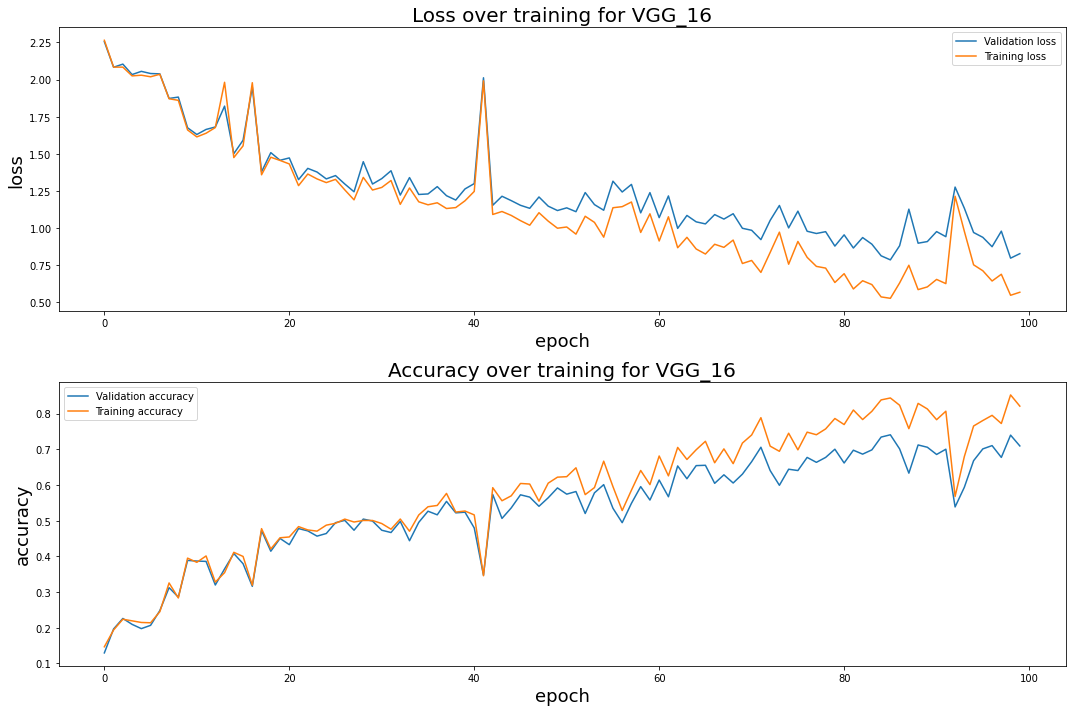

In [3]:
modelName = "VGG_16"

Demonstrate.demonstrateModel(modelName,VGG_16, root_directory)

<h4>Alex Net</h4>

testing model: Alex_Net
The final training accuracy was:  0.9852807971014492
The final validation accuracy was:  0.8529411764705882


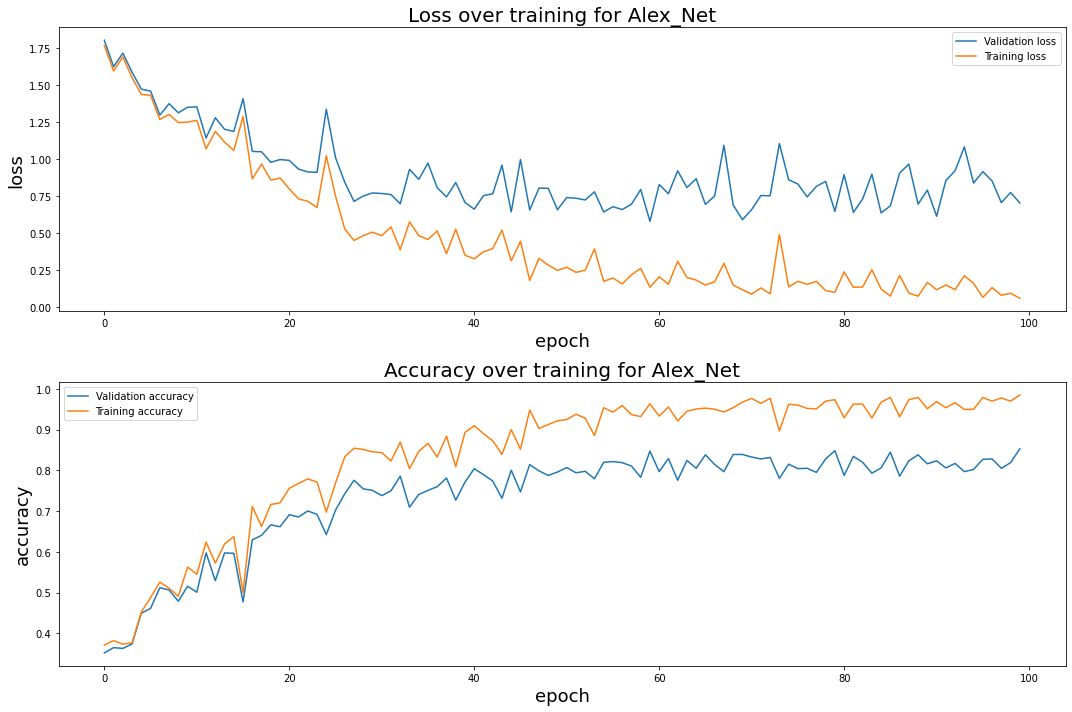

In [4]:
modelName = "Alex_Net"

Demonstrate.demonstrateModel(modelName,AlexNet, root_directory)

<h3>Experiments/models:</h3>

<h4>Experiment</h4>

testing model: experiment
The final training accuracy was:  0.9895833333333334
The final validation accuracy was:  0.5514705882352942


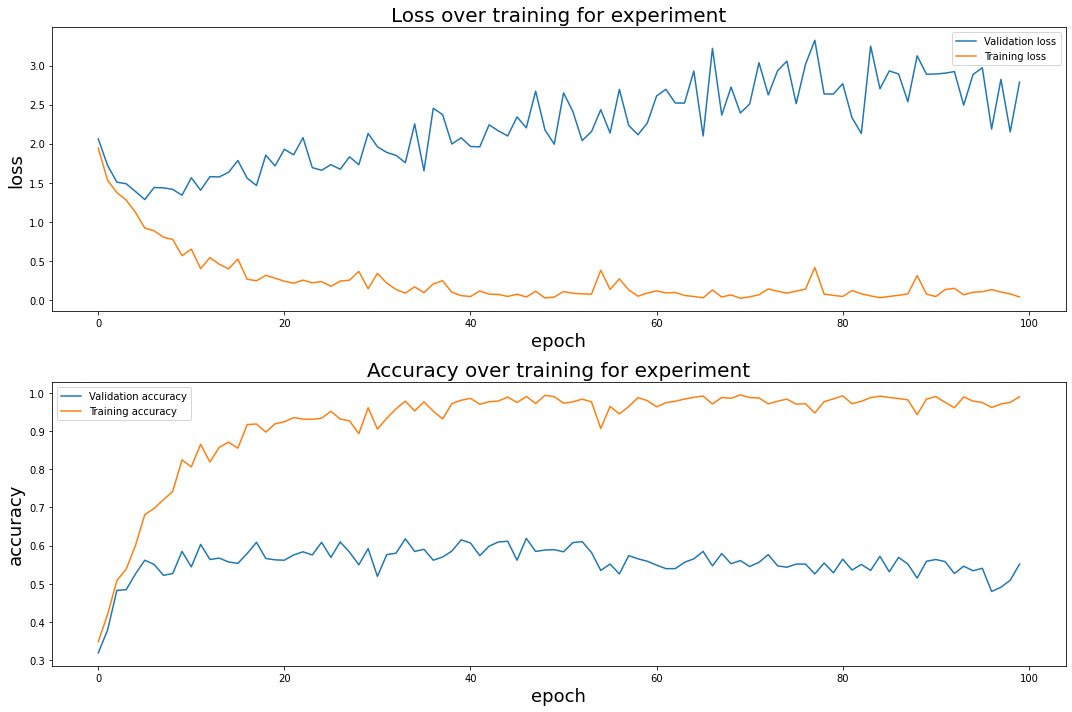

In [5]:
modelName = "experiment"

Demonstrate.demonstrateModel(modelName,Experiment, root_directory)

<h4>Basic CNN</h4>

Note for bellow diagram:
pooling is set at size 2.
Dropout is not applied (so far)

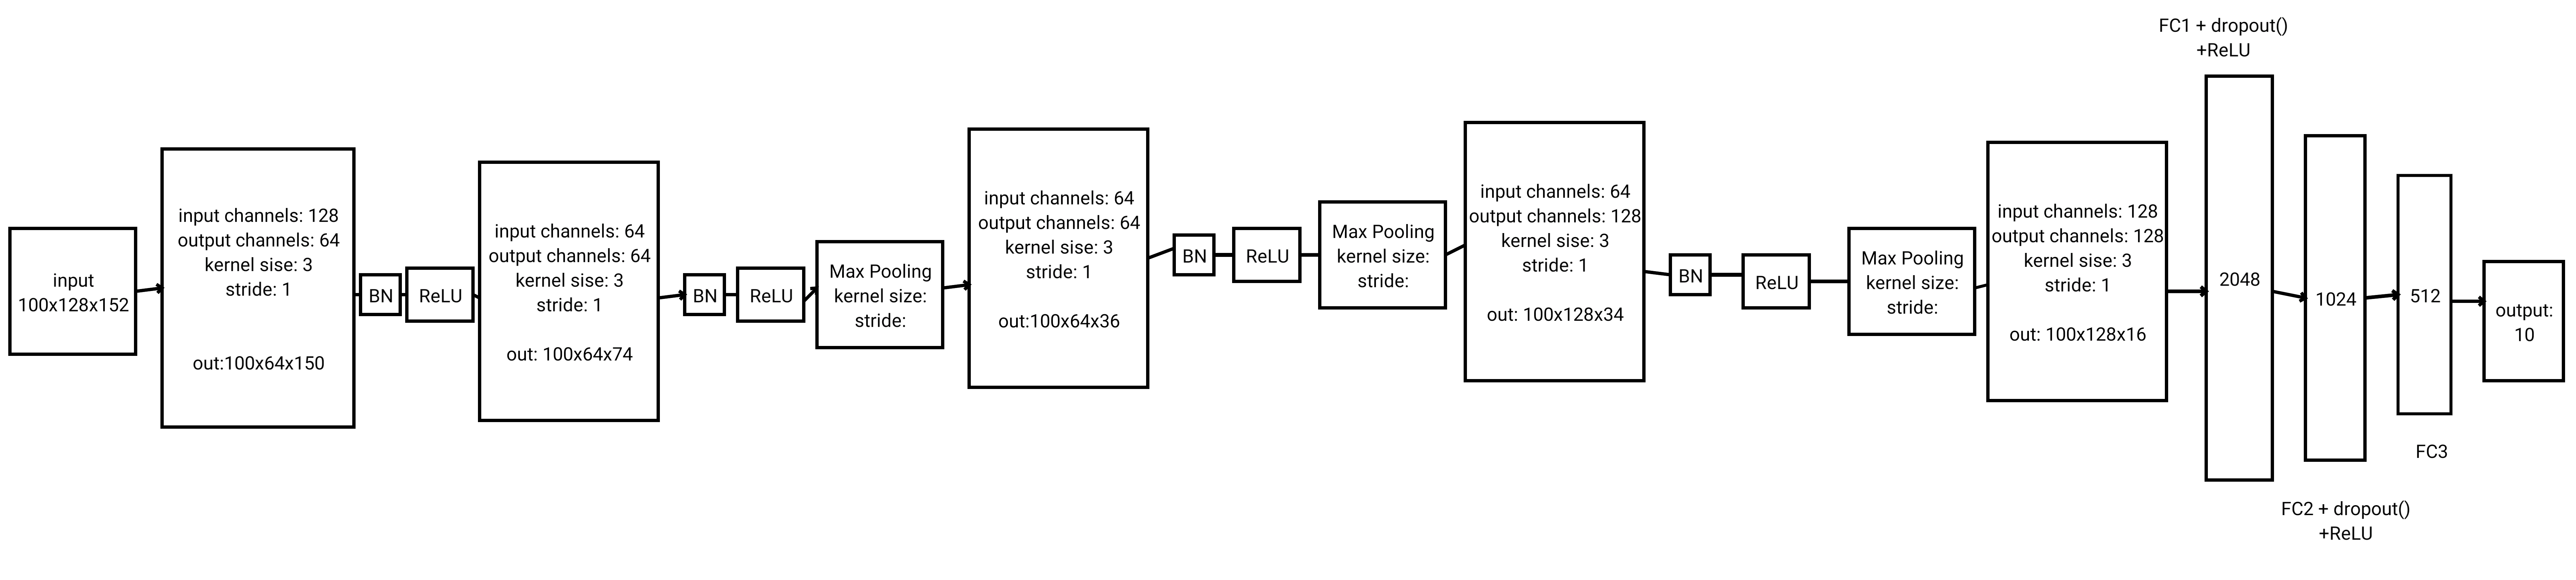

In [6]:
nameOfModel = f"{diagramsPath}/Basic CNN.png"
Image(filename=nameOfModel)

testing model: CNN_1D_RawMelSpectogram_1024_lessDropout
The final training accuracy was:  0.9753170289855072
The final validation accuracy was:  0.7628676470588235


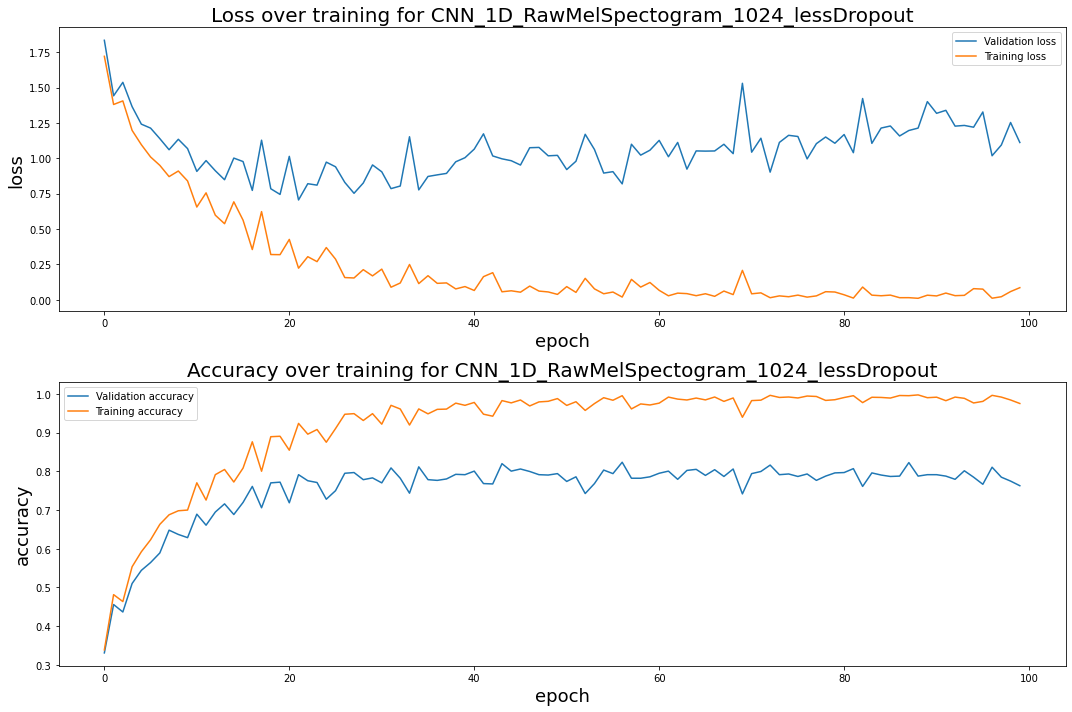

In [7]:
modelName = "CNN_1D_RawMelSpectogram_1024_lessDropout"

Demonstrate.demonstrateModel(modelName,MelSpectogram_CNN_1024_LessDropout, root_directory)



From above model, I decided to see 3 seperate different benefits:

<h4>Better CNN: added dropout to FC layers</h4>

This is typical approach to using dropout (according to the official paper),
were you put it in FC layer.

testing model: MelSpectogram_CNN_1024_MoreDropout
The final training accuracy was:  0.9698822463768116
The final validation accuracy was:  0.8318014705882353


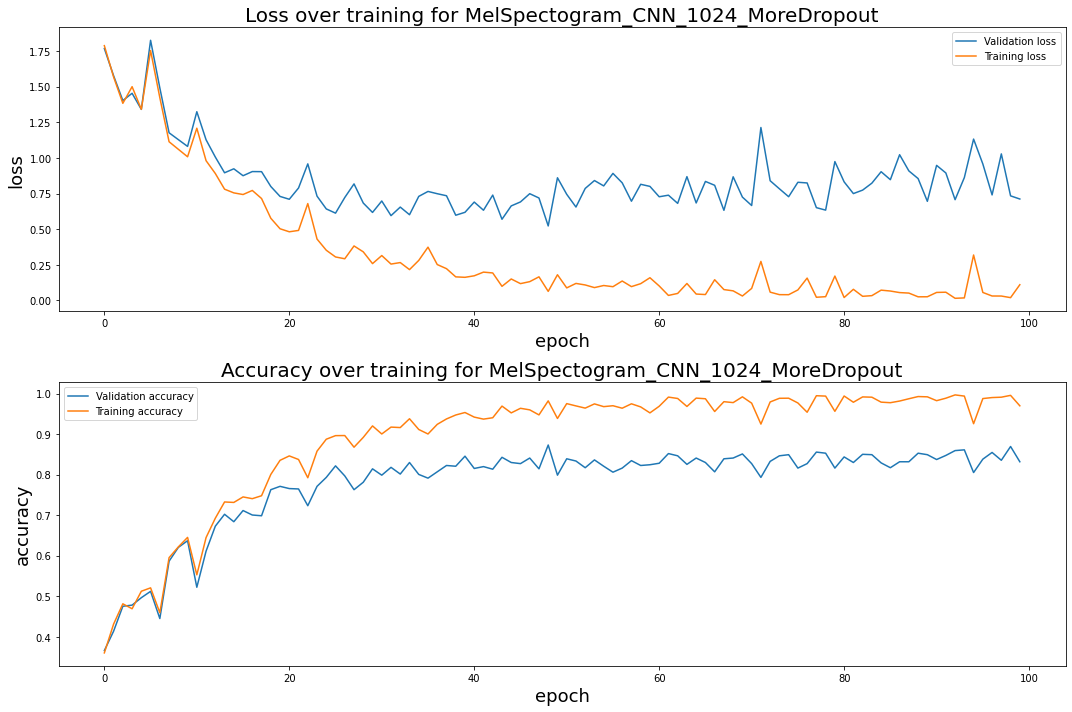

In [8]:
modelName = "MelSpectogram_CNN_1024_MoreDropout"

Demonstrate.demonstrateModel(modelName,MelSpectogram_CNN_1024_MoreDropout, root_directory)

Also, as a side, I explored what best window-size was (1024, 512, or 256) with hop size of 50%.

1024 was found best


frame_size = 512:

testing model: CNN_1D_RawMelSpectogram_512
The final training accuracy was:  0.9875452898550725
The final validation accuracy was:  0.8308823529411765


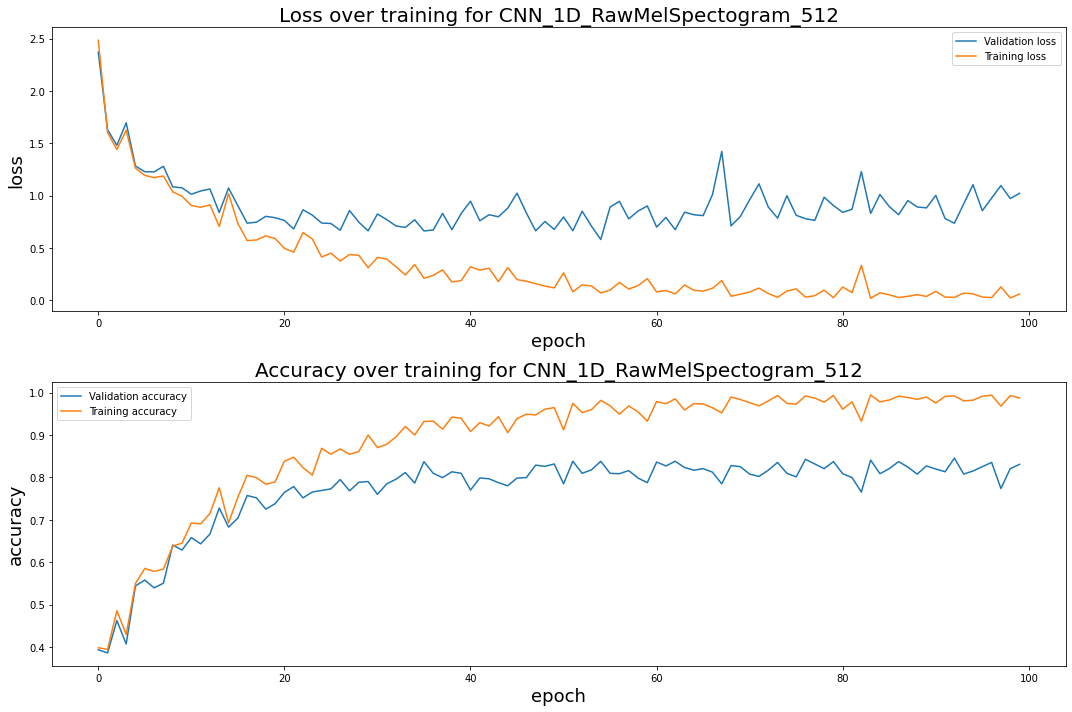

In [9]:
modelName = "CNN_1D_RawMelSpectogram_512"

Demonstrate.demonstrateModel(modelName,MelSpectogram_CNN_512, root_directory)


frame_size = 256:

testing model: CNN_1D_RawMelSpectogram_256
The final training accuracy was:  0.9551630434782609
The final validation accuracy was:  0.7784926470588235


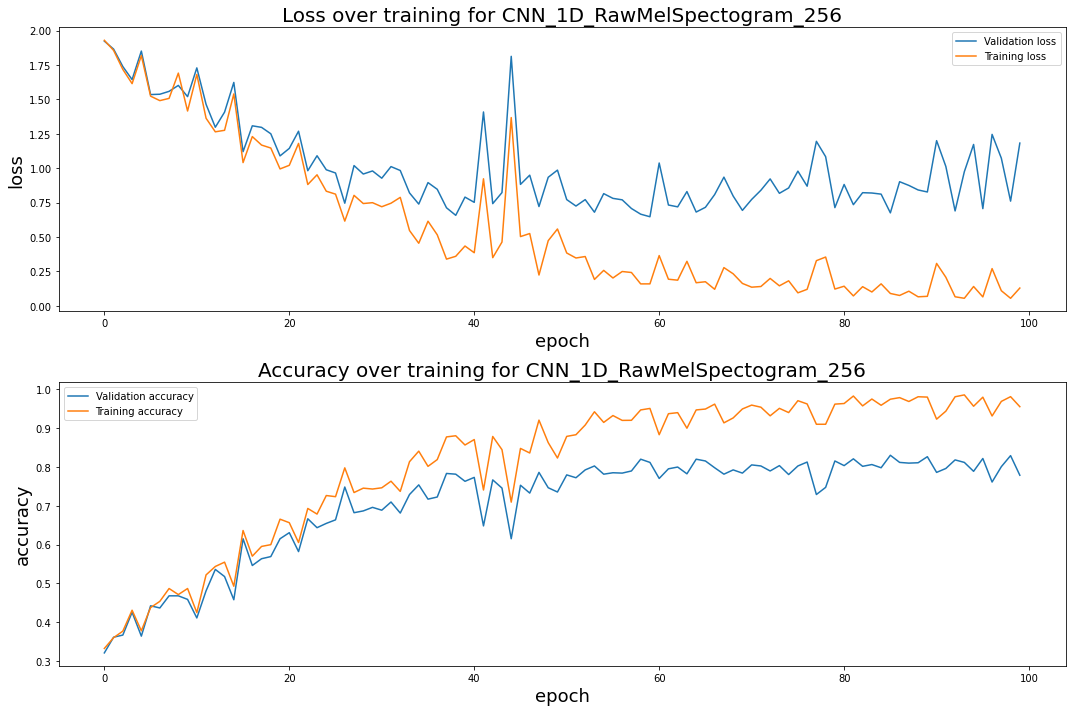

In [10]:
modelName = "CNN_1D_RawMelSpectogram_256"

Demonstrate.demonstrateModel(modelName,MelSpectogram_CNN_512, root_directory)


<h4>Better CNN: replaced fully connected with GAP</h4>

Global average pooling is something I discussed in my paper.



testing model: MelSpectogram_CNN_1024_WithGAP
The final training accuracy was:  0.9993206521739131
The final validation accuracy was:  0.921875


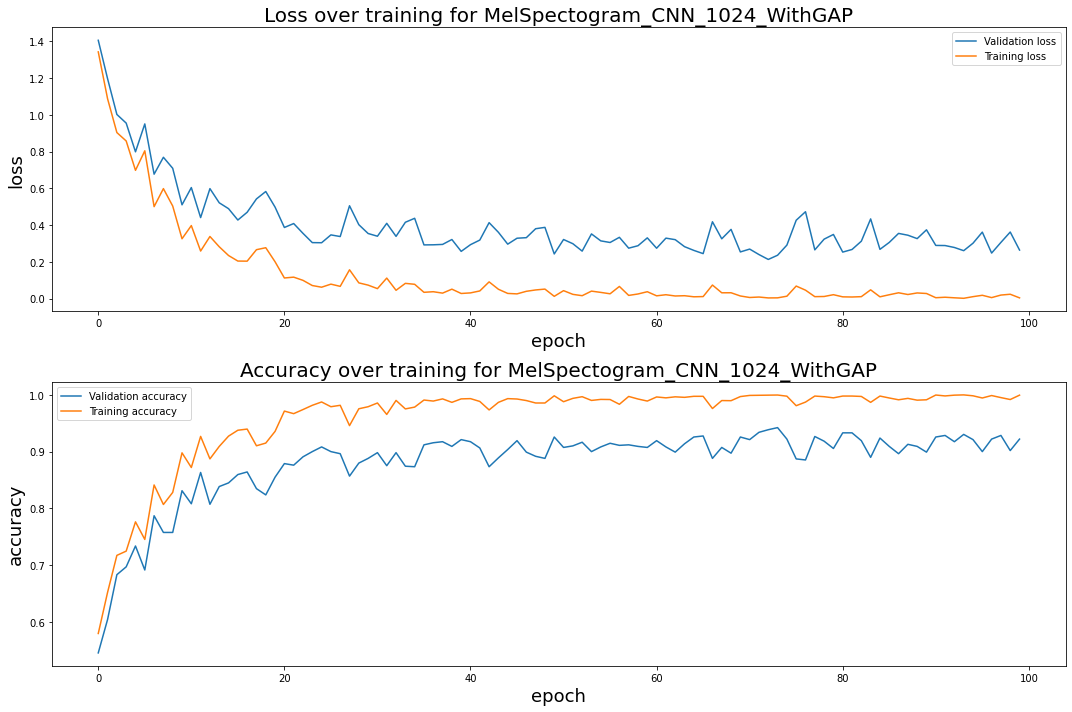

In [11]:
modelName = "MelSpectogram_CNN_1024_WithGAP"

Demonstrate.demonstrateModel(modelName,MelSpectogram_CNN_1024_WIthGAP, root_directory)

<h4>Better CNN: replaced maxpooling with strided convolutions (with expansion/'pumping' of channels)</h4>

testing model: MelSpectogram_CNN_1024_ConvsInsteadOfPools
The final training accuracy was:  0.9932065217391305
The final validation accuracy was:  0.8235294117647058


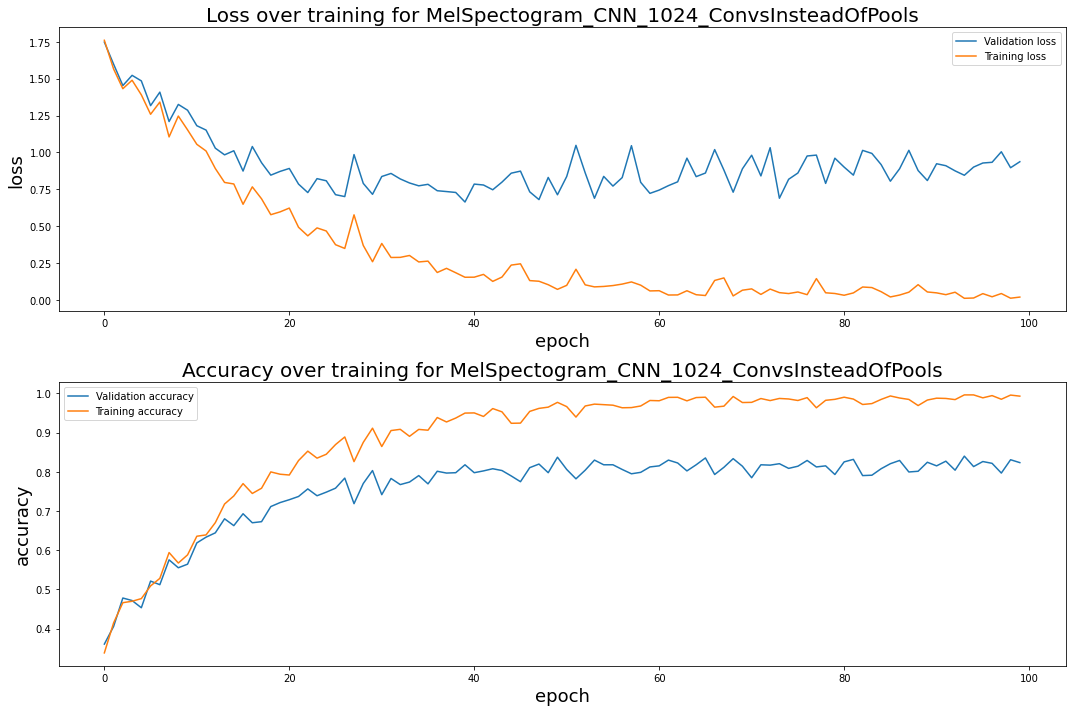

In [12]:
modelName = "MelSpectogram_CNN_1024_ConvsInsteadOfPools"

Demonstrate.demonstrateModel(modelName, MelSpectogram_CNN_1024_ConvsInsteadOfPools, root_directory)

<h4>Better CNN: replaced maxpooling with strided convolutions (without expansion)</h4>


testing model: MelSpectogram_CNN_1024_ConvsInsteadOfPools_withoutPumping
The final training accuracy was:  0.9911684782608695
The final validation accuracy was:  0.8336397058823529


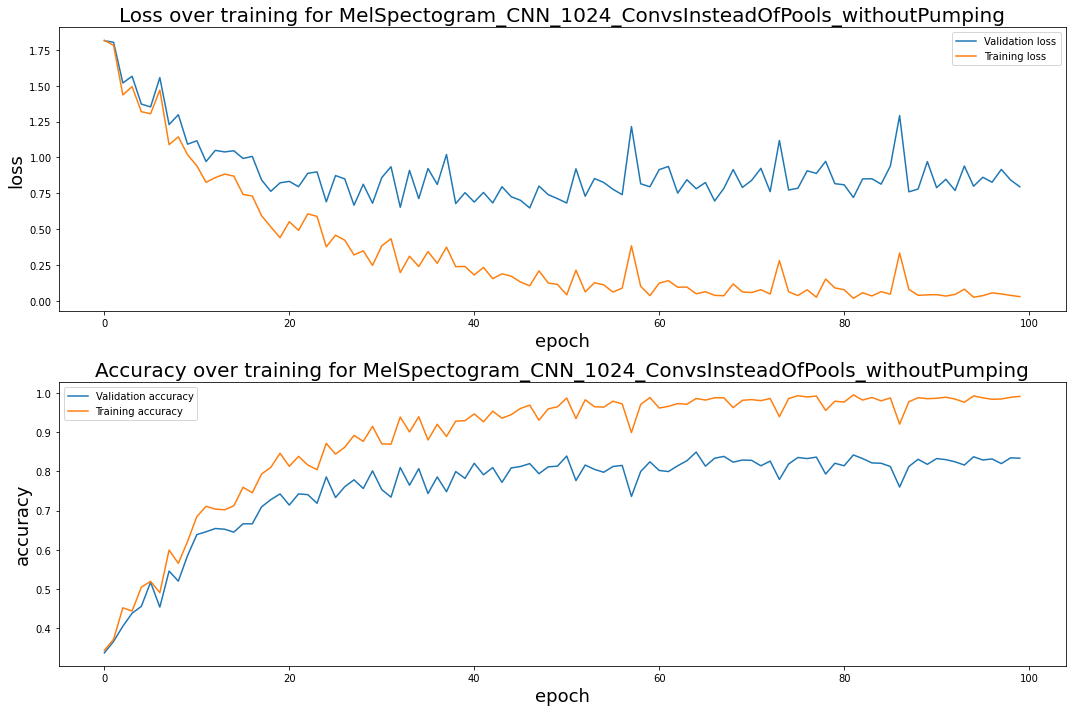

In [13]:
modelName = "MelSpectogram_CNN_1024_ConvsInsteadOfPools_withoutPumping"

Demonstrate.demonstrateModel(modelName, MelSpectogram_CNN_1024_ConvsInsteadOfPools_withoutPumping, root_directory)


Some other things I tried were:
1) Bottleneck around the "convolution pooling"
(that replaces maxpooling). But, this reduces performance.
This makes sense as:

<h3>conclusion of these approaches:

From this, I can conclude that GAP
works better than using fully connected layers.

I also concluded that replacing MaxPooling with
strided convolutions showed significant accuracy
improvement, but was best when I increased
channels out.

I coined this pumping (although it probably has
a different name, were the convolution after the
pooling convolution shrinks the channels.

This lead me on to arrive at the below model:

note: all convolution network = ACN

<h3>ACN_CNN1D_GAP</h3>

testing model: MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP
The final training accuracy was:  0.9988677536231884
The final validation accuracy was:  0.9044117647058824


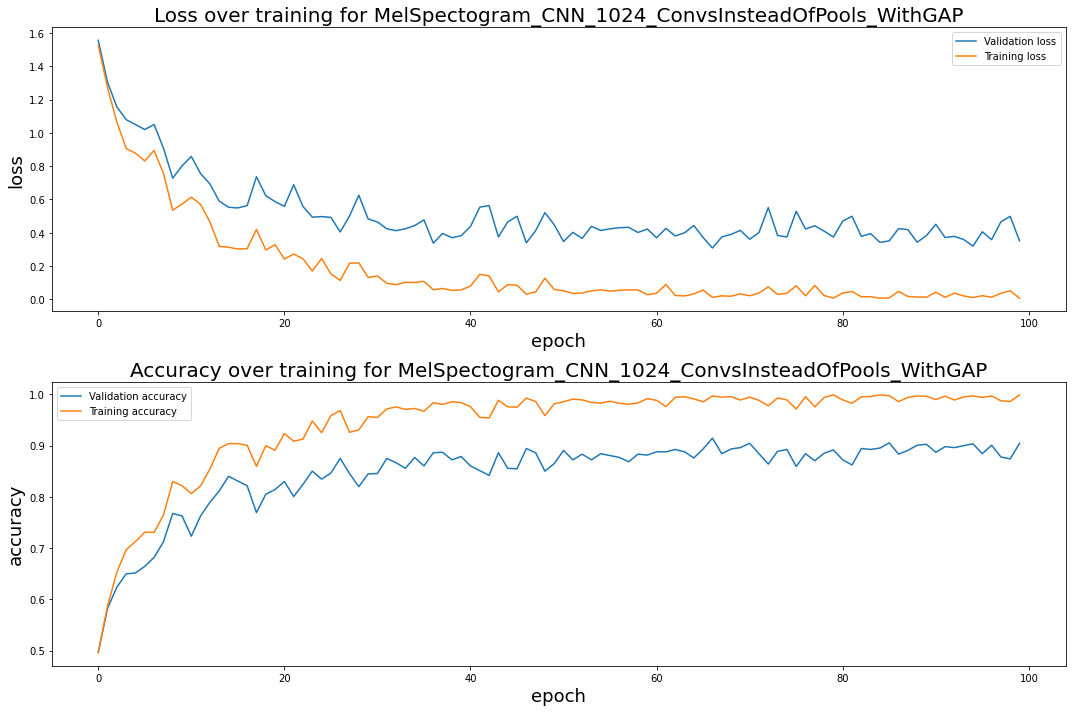

In [14]:
modelName = "MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP"

Demonstrate.demonstrateModel(modelName, MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP, root_directory)

But, then I made some adjustments to make
a better one

testing model: MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP_WithAdjustments
The final training accuracy was:  0.994338768115942
The final validation accuracy was:  0.9044117647058824


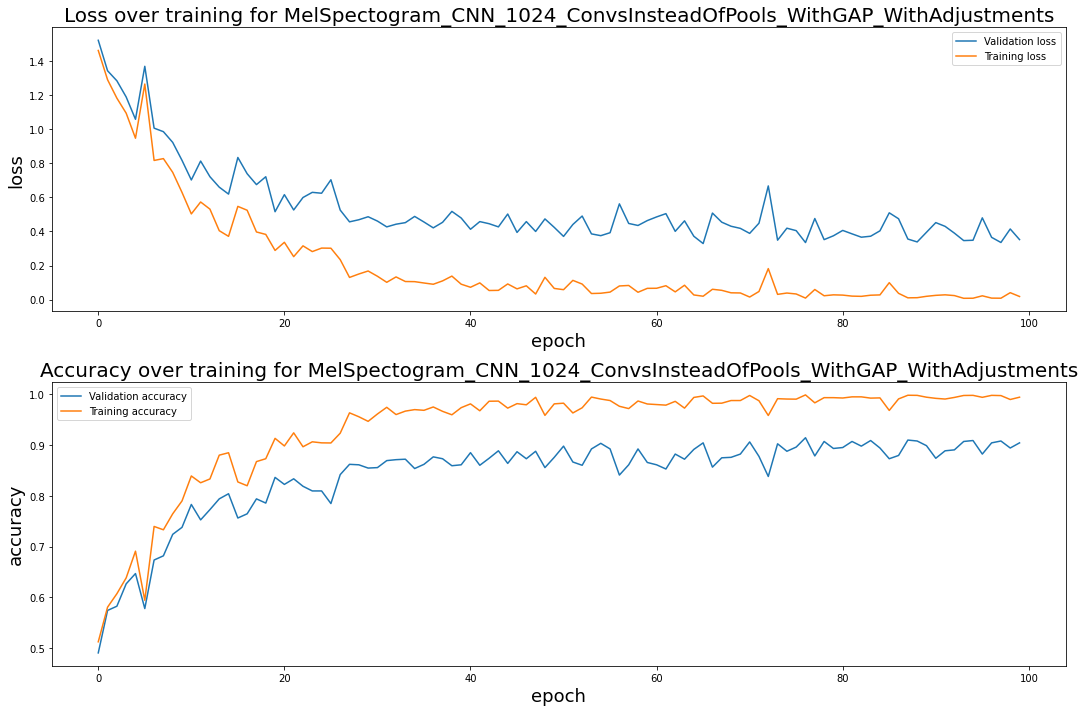

In [15]:
modelName = "MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP_WithAdjustments"

Demonstrate.demonstrateModel(modelName, MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP_WithAdjustments, root_directory)

And this is the same model above shrunk down:



testing model: MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP_Smaller
The final training accuracy was:  0.9891304347826086
The final validation accuracy was:  0.8887867647058824


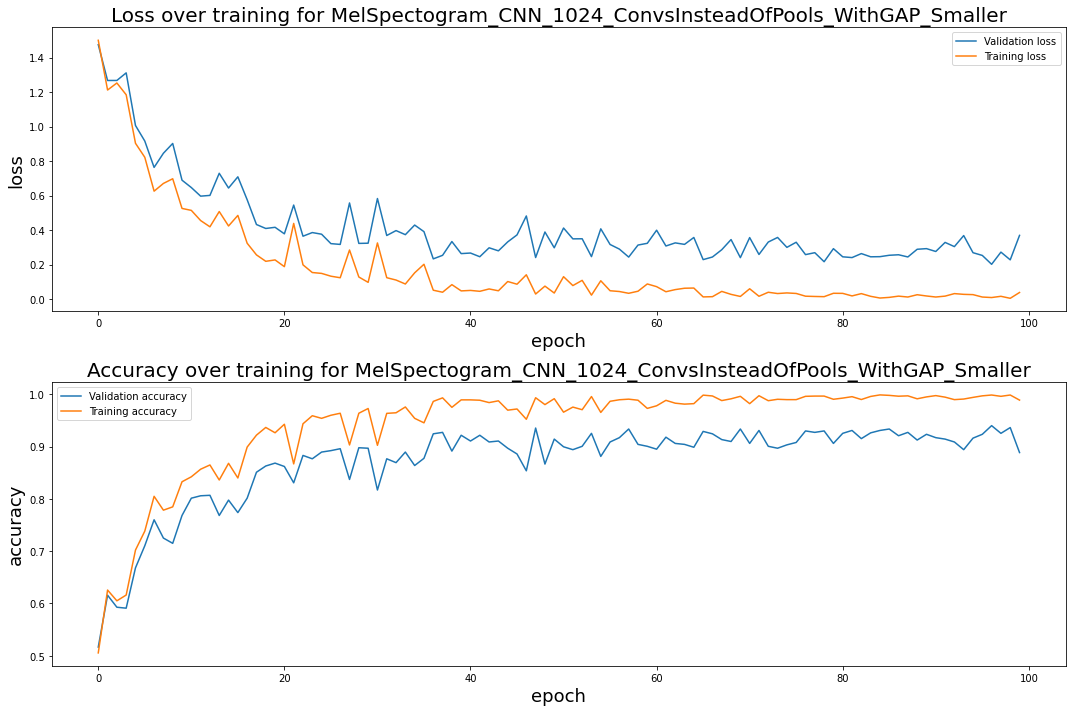

In [16]:
modelName = "MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP_Smaller"

Demonstrate.demonstrateModel(modelName, MelSpectogram_CNN_1024_ConvsInsteadOfPools_WithGAP_Smaller, root_directory)


<h1>Part 2: Raw waveform</h1>

Firstly I started with

I read the SampleCNN later on in
this project, and I had made this
model by the time I read the paper.

They ended up being very similar,
except theres had 11 layers.

I originally tried 7 layers,
but kept building up.

<h3>Starting "SampleCNN"</h3>

In [ ]:
modelName = "CNN_1D_RawAudio_100%"

Demonstrate.demonstrateModel(modelName, RawAudio_CNN, root_directory,True)

testing model: CNN_1D_RawAudio_100%


Then I tried adding more dropout of 0.1 at each convolution layer.

This was worse.

Then I replaced FC layers with GAP layers,
which performed better

In [ ]:
modelName = "CNN_1D_RawAudio_100%_WithGAP"

Demonstrate.demonstrateModel(modelName,
                             RawAudio_CNN_WithGAP,
                             root_directory,True)

I then made some adjustments, such as:
Replacing maxpool with convs
and adding leaky relus (to replace regular relus) at GAP
(but not in rest of network), because there are
less parameters and so we want to protect these from dying (dying relu).
We accept a healthy amount of "brain damage"
 throughout the rest of the network .
 If apply leaky relu everywhere, performance goes down.


<h3>ACN_SampleCNN</h3>

In [ ]:
modelName = "CNN_1D_RawAudio_100%_WithGAP_WithSomeAdjustments"

Demonstrate.demonstrateModel(modelName,
                             RawAudio_CNN_WithGAP_WithSomeAdjustments,
                             root_directory,True)
